## Описание проекта и целей

Цель данного проекта – исследование влияния качества данных на точность предсказаний модели логистической регресии. В частности, анализируется влияние обработки пропущенных значений, выбросов и категориальных переменных на итоговые метрики качества модели, такие как Recall, Precision, и Accuracy. Работа демонстрирует процесс предобработки данных и сравнение метрик моделей на оригинальных и обработанных данных.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [103]:
import warnings
warnings.filterwarnings('ignore')

### Получение и загрузка данных.

In [187]:
df1 = pd.read_csv('titanic_dataset(train).csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Удаление всех пропущенных значений и категориальных переменных.

In [189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
df1["Survived"] = df1["Survived"].astype("category")

In [191]:
df1 = df1[['Age', 'Fare', "Survived"]]

In [192]:
df1 = df1.dropna()

### Обучение модели. Расчет метрики качества.

In [193]:
model = LogisticRegression()

In [194]:
X = df1.drop(columns=['Survived'])
y = df1['Survived']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [197]:
print(f'Recall Score: {recall_score(y_test, predictions)}')
print(f'Precision_score: {precision_score(y_test, predictions)}')
print(f'Accuracy Score: {accuracy_score(y_test, predictions)}')

Recall Score: 0.30357142857142855
Precision_score: 0.5483870967741935
Accuracy Score: 0.6293706293706294


### Снова загружаем полные данные.

In [199]:
df2 = pd.read_csv('titanic_dataset(train).csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Удаление признаков, которые логически не нужны для построения модели.

In [201]:
df2 = df2.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

На освнове этих данных мы никак не можем происзвести какие-либо предсказания, так как это не категориальные и не числовые данные

### Какой процент данных будет потерян, если просто удалить пропуски.

In [203]:
print(f'При удалении всех пропусков будет потеряно примерно {df2.shape[0]//df2.isna().sum().sum()}%')

При удалении всех пропусков будет потеряно примерно 4%


### Заполнение пропусков 

Для разных признаков будем использовать  подходящий метод: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом.

In [204]:
df2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [205]:
median_ages = df2.groupby(['Pclass', 'Sex'])['Age'].median()
median_ages

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [206]:
for index, age in median_ages.items():
    pclass, sex = index
    df2.loc[(df2['Age'].isnull()) & (df2['Pclass'] == pclass) & (df2['Sex'] == sex), 'Age'] = age

In [207]:
df2 = df2.dropna()

### Категориальные переменные переводим в цифровые значения (d.get_dummies, preprocessing.LabelEncoder). 

In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [210]:
df2["Survived"] = df2["Survived"].astype("category")
df2["Pclass"] = df2["Pclass"].astype("category")
df2["Sex"] = df2["Sex"].astype("category")
df2["Embarked"] = df2["Embarked"].astype("category")
df2["Age"] = df2["Age"].astype("int")

In [211]:
df2_for_reg = pd.get_dummies(df2, columns=['Survived', 'Pclass', 'Sex', 'Embarked'])
df2_for_reg.head()

,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


### Проверяем данные на наличие выбросов.

In [213]:
sns.set(style='white')
sns.set_palette('pastel')

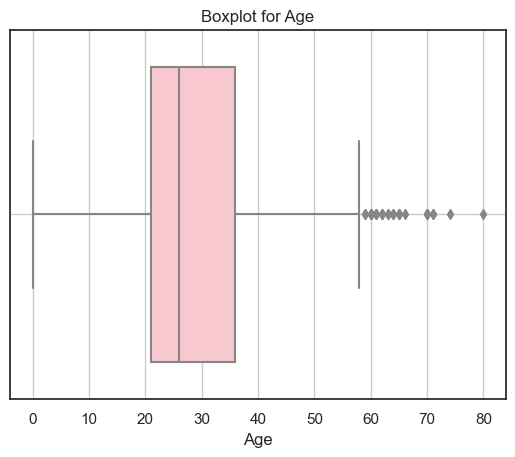

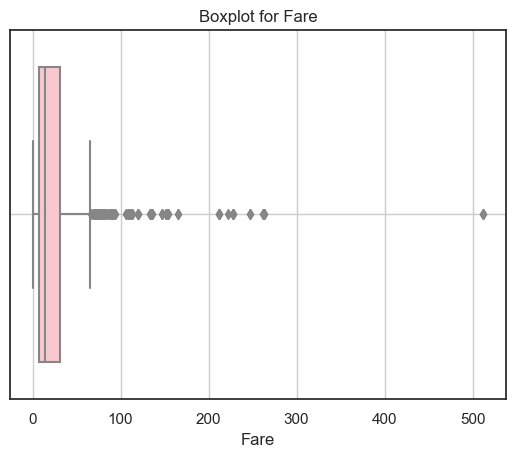

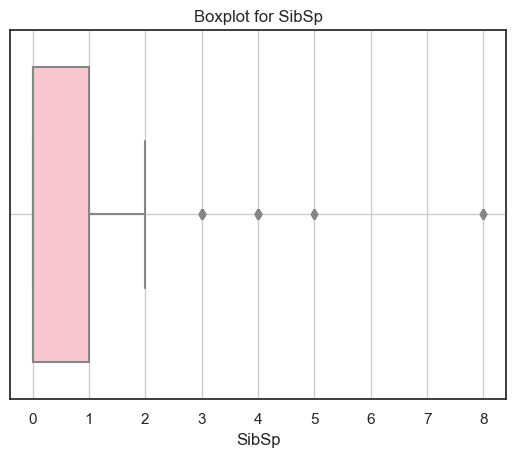

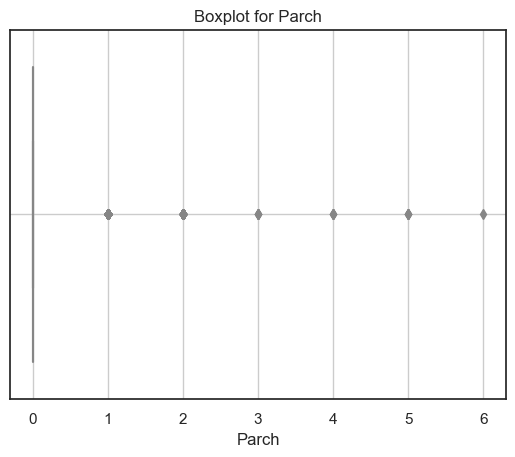

In [214]:
columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']

for column in columns_to_check:
    sns.boxplot(x=df2[column], color='pink')
    plt.title(f'Boxplot for {column}')
    plt.grid(True)
    plt.show()

Все числовые переменные выглядят вполне нормально, так как количество родственников и разброс возраста в действительности мог сильно варьироваться, так же как и стоимость билетов (люксовый номер, скидки и пр.) 
Однако стоит проверить этот странный выброс справа по fare

In [216]:
df2[df2['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35,0,0,512.3292,C
679,1,1,male,36,0,1,512.3292,C
737,1,1,male,35,0,0,512.3292,C


Можно увидеть, что вполне мог быть как вариант супер пупер мега люкса, учитывая что цена у всех одинаковая

### Визуализация.

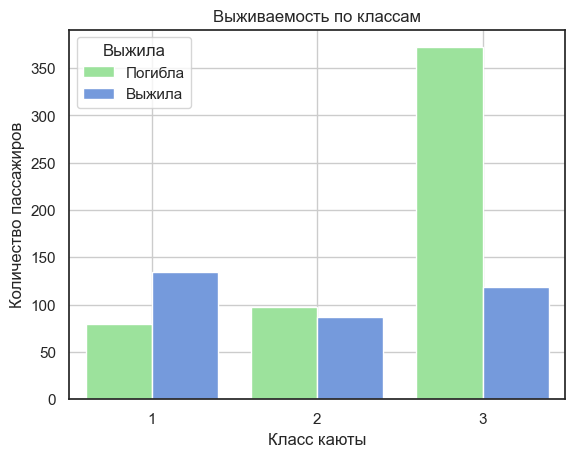

In [219]:
# График выживаемости по классам
sns.countplot(x='Pclass', hue='Survived', data=df2, palette=['lightgreen', 'cornflowerblue'])
plt.title('Выживаемость по классам')
plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжила', labels=['Погибла', 'Выжила'])
plt.grid(True)
plt.show()

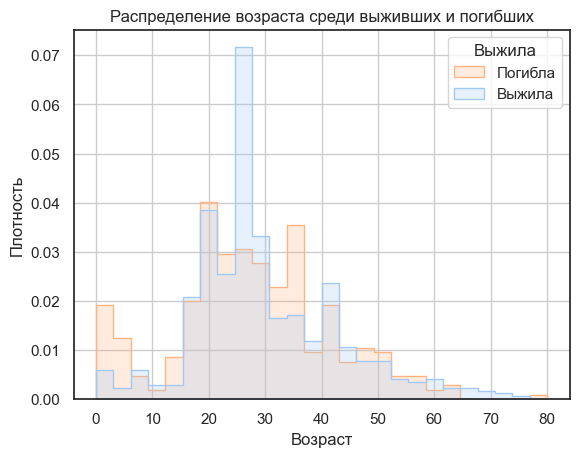

In [220]:
# График распределения возраста среди выживших и погибших
sns.histplot(df2, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(title='Выжила', labels=['Погибла', 'Выжила'])
plt.grid(True)
plt.show()

### Математически преобразуем признак Age.

In [222]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df2['AgeGroup'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)

In [223]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22,1,0,7.2500,S,Young Adult
1,1,1,female,38,1,0,71.2833,C,Adult
2,1,3,female,26,0,0,7.9250,S,Young Adult
3,1,1,female,35,1,0,53.1000,S,Adult
4,0,3,male,35,0,0,8.0500,S,Adult


### Обучим нашу модель на преобразованных данных

In [225]:
X = df2_for_reg.drop(columns=['Survived_0', 'Survived_1'])
y = df2_for_reg['Survived_1']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [228]:
print(f'Recall Score: {recall_score(y_test, predictions)}')
print(f'Precision_score: {precision_score(y_test, predictions)}')
print(f'Accuracy Score: {accuracy_score(y_test, predictions)}')

Recall Score: 0.782608695652174
Precision_score: 0.7297297297297297
Accuracy Score: 0.8033707865168539


### Выводы по проделанной работе.

a. Была проведена тщательная предобработка данных, 
включая обработку пропущенных значений, 
преобразование категориальных переменных и удаление выбросов. 
Эти шаги были предприняты для оптимизации качества данных перед обучением модели.

b. Модель, обученная на тщательно обработанных данных, 
показала значительное улучшение по всем метрикам по сравнению с базовой моделью. 
Это подтверждает важность предварительной обработки данных.

c. Exploratory data analysis (EDA) и предобработка данных 
играют ключевую роль в построении эффективных моделей машинного обучения. 
Как видно из сравнения метрик, качественная предобработка может существенно улучшить результаты модели.
Что касается больших данных, то EDA и предобработка остаются важными, 
но могут потребовать других подходов из-за ограничений по времени и ресурсам. 
В больших датасетах может быть целесообразно провести EDA на подвыборке данных 
или использовать оптимизированные инструменты и методы.